# Detection of an unknown pulsar and measurement of its period
## Crab Pulsar Experiement Part 3.1

Use this notebook as a template to complate Part 3.1 of the lab script. Use the notebook to annotate your code and document the program. You can print this later and include as part of your lab book.

To begin, start by executing each of the cells in turn to see how the demo program works.

In [36]:
# To begin, we import some libraries that we will need later.

# Some handy standard python libraries
import os

# The numpy library will allow us to do FFTs
import numpy as np

# The pyplot module from matplotlib will allow us to plot things.
from  matplotlib import pyplot as plt

# pi is a useful value!
from math import pi




## Reference manuals

There are many useful python libraries. You may find the following links helpful in programming your code

 * [Numpy FFT module](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html)

 * [Matplotlib manual](https://matplotlib.org/api/pyplot_api.html)

## Getting at the data

There are 5 data files avaliable, each with a different pulsar signal. The sample code below will print the names of the data files to the screen. Each data file has an associated header file which contains useful information about the data. Change the variables "myfile" and "hdrfile" to select which file you want to work on. Remeber that you have to re-run all the following code if you have changed the file. A useful command could be to select "Cell" -> "Run All Below", from the menu.

In [9]:
# A good test to do is if you can see the contents of the directory in which you work on your google drive.
# Here "My Drive" refers to the "root" of your google drive.
# By default your notebook should be in a directory called Colab Notebooks.
# This template assumes all files you want to read in are copied in the
# same directory. Note the slash at the end of the first line.
# pathcrabtemplate ='Crab_pulsar_template/'
# filelist = []
# for (dirpath, dirnames, filenames) in os.walk(pathcrabtemplate):
#     filelist.extend(filenames)
#     break
# print (filelist)   # Show the contents of your working directory. At least your notebook should show up here.

[]


## Note on the data format

Each dataset is composed of two files, one labeled `.hdr` and one labeled `.dat`.

### The `.hdr` file
This is a plain text (ASCII) format file containing key-value pairs of metadata regarding the observation.

### The `.dat` file
This is 'unformatted' raw binary data. The data are arranged in sequence with 1 byte per sample. Each sample is a single 8-bit signed integer, i.e. taking a value between -128 and +127. The samples are spaced uniformly in time.

In [37]:
# Defining the path to the data files...
data_directory=os.path.join('LovellTimeSeries/')

print("Files avaliable:",os.listdir(data_directory))

# this is the file we will work on. Change this to select the observation you want to process.
myfile = "psr4.dat"
hdrfile= "psr4.hdr"

Files avaliable: ['psr0.dat', 'psr0.hdr', 'psr1.dat', 'psr1.hdr', 'psr2.dat', 'psr2.hdr', 'psr3.dat', 'psr3.hdr', 'psr4.dat', 'psr4.hdr', 'psr5.dat', 'psr5.hdr']


## Fourier transform Demo

This demo code will generate a sinusoid burried in random noise, and will demonstrate the power of the Fourier transform to identify periodic signals in the data.

You should run and experiment with this code before adapting it to compute the Fourier transform of your pulsar data.

Date 98/10/02
MJD  51088
UT   13:40:17.0
Freq1 1422.49997
Tsamp 2.0000000

Tsamp = 0.01 seconds
Total observation time is 2621.44 seconds


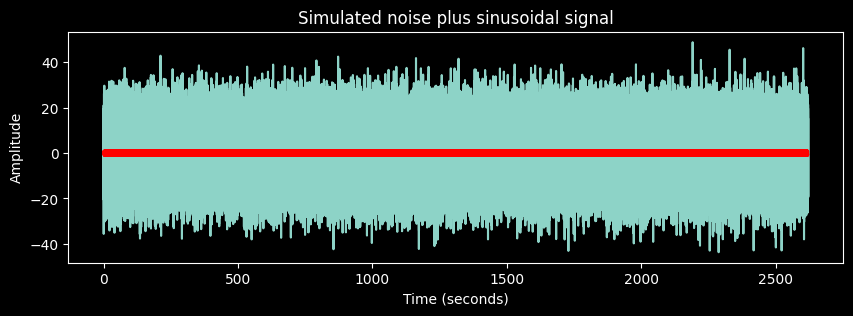

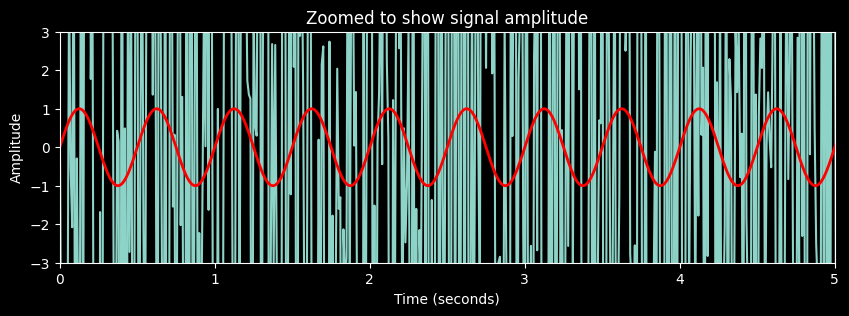

In [38]:
dt = 0.01 # this will store our sample interval once read from the header

# Read the header file.
with open(os.path.join(data_directory,hdrfile)) as f:
    for line in f:
        line=line.strip()
        print(line)
        # In this demo code we just read the header and print it to the screen
        # You need to implement code to parse the header and get the values you need.
print("Tsamp = {} seconds".format(dt))


# Here you should read the raw data as a stream of bytes. The easiest way is using the fromfile routine in numpy.
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.fromfile.html

# in this demo, we will generate random noise plus a sinusoid to simulate our pulsar signal
# For the real pulsar signals, you will have to read the data and determine the number of points from the data array.
npts = 262144
t = np.linspace(0,(npts-1)*dt,npts)

# The period of our sinusoid
period = 0.5

# Look up the numpy.random.normal function (try searching google or the numpy website)
# to understand what the arguments for this function do.
random_noise = np.random.normal(0,10,npts)

# Here "t" is an array, but numpy handles this how you would expect maths to work
# Fake signal will also contain an array of data points
fake_signal  = np.sin(2*pi*t/period)

# This adds each element from random_noise to the corresponding element from fake_signal
# Note, it only works when the arrays are the same length!
raw_bytes = random_noise + fake_signal


# We can plot the data.
print("Total observation time is {} seconds".format(len(raw_bytes)*dt))
plt.figure(figsize=(10,3))
plt.plot(t,raw_bytes)
# here we over-plot the simulated signal we injected in red.
# Notice that it is too small to see compared to the noise we generated.
plt.plot(t,fake_signal,color='red')
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Simulated noise plus sinusoidal signal")


# create a new figure zoomed to show the signal.
plt.figure(figsize=(10,3))
plt.plot(t,raw_bytes)
plt.plot(t,fake_signal,color='red',linewidth=2)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Zoomed to show signal amplitude")
plt.xlim(0,5)
plt.ylim(-3,3)
plt.show()

## The FFT

This part of the code executes the Fourier transform using the Fast Fourier transform algorithm (FFT). See the numpy reference page for the FFT module for an understanding of what the algorithm actually computes.

https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html

In this demo, we use the "rfft" routine since we are computing a transform on real data. You will need to compute the x-values to plot for the frequency axis. Check that the frequency of the signal in your power spectrum matches the period you set in the simulation code.

For your real data, you might have some very strong signals, and therefore have to re-scale the axes to identify the pulsar signals. It could help to first plot the logarithm of the power to compress the brightest signals.

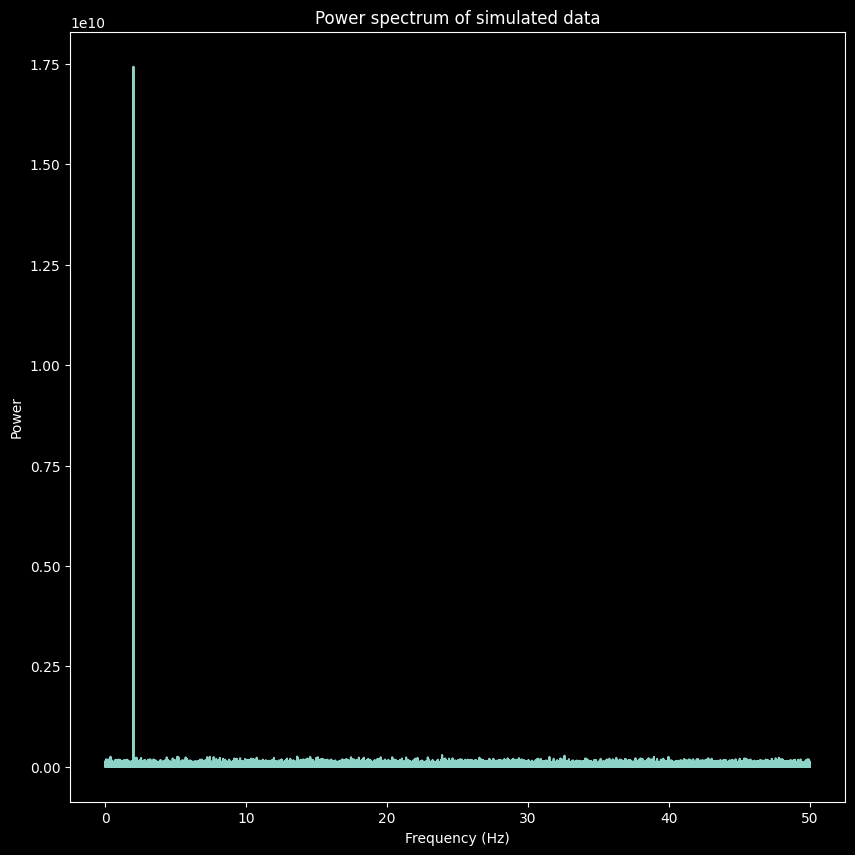

Peak frequency is 2.0000457763671875 Hz
This corresponds to a period of 0.4999885561701316 seconds


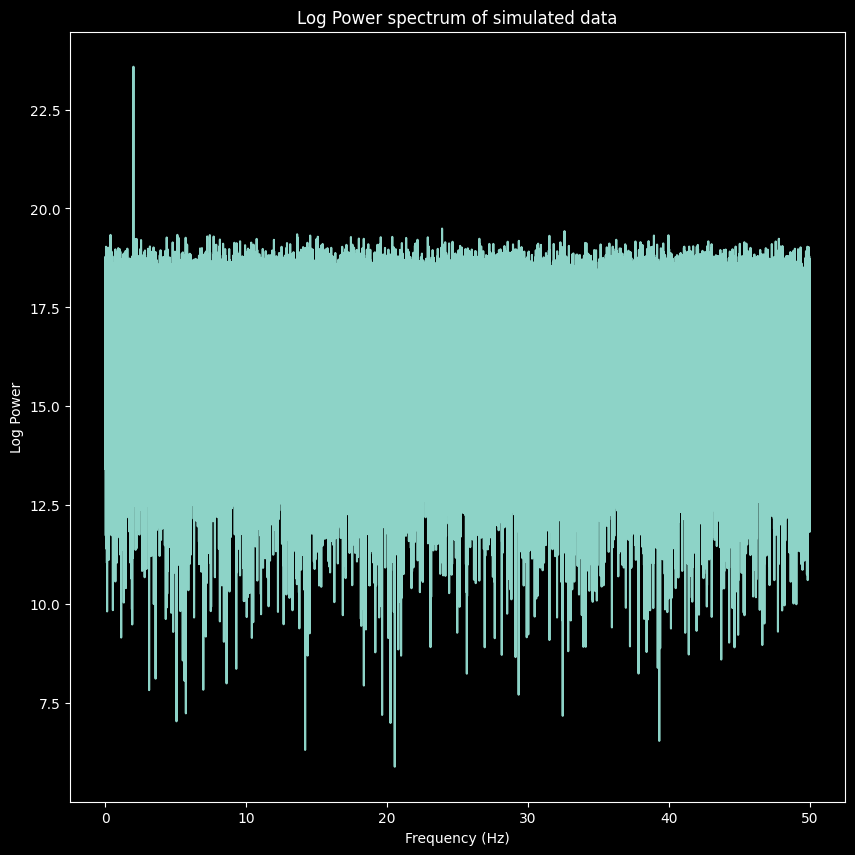

In [35]:
ft = np.fft.rfft(raw_bytes)

# The Fourier transform of a real-valued sequence sill creates complex values. Here we just take the "power spectrum".
# Note that the real() function from numpy operates on the entire array of numbers, and the multiply and add operators
# act over the entire array, summing elementwise.
power = np.real(ft)*np.real(ft) + np.imag(ft)*np.imag(ft)

# sample frequency is the inverse of the sample interval
fs = 1/dt

freqs = np.fft.rfftfreq(npts,dt)
plt.figure(figsize=(10,10))
plt.plot(freqs,power)
plt.xlabel("Frequency (Hz)") # change this line to add your x-axis label
plt.ylabel("Power")
plt.title("Power spectrum of simulated data")
plt.show()

# calculate period
peak_frequency = freqs[np.argmax(power)]
print("Peak frequency is {} Hz".format(peak_frequency))
print("This corresponds to a period of {} seconds".format(1/peak_frequency))

# plot log
plt.figure(figsize=(10,10))
plt.plot(freqs,np.log(power))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Log Power")
plt.title("Log Power spectrum of simulated data")
plt.show()